#### What is customer churn?
It is when an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company.  

Contractual churn: When a customer is under contract for a service and decides to cancel their service. Example: Cable TV, SaaS products (Software as a Service e.g. Dropbox).

Voluntary churn: When a user voluntarily cancels a service and includes prepaid cell phones, streaming subscriptions.

Non-contractual churn: When a customer is not under contract for a service and includes customer loyality at a retail location or online browsing. 

Involuntary churn: When a churn occurs not at the request of the customer. For example: credit card expiration, utilities being shut off by the provider.

Most likely, you as a customer have cancelled a service for a variety of reasons including lack of usage, poor service or better price. 

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Dataset: cellular usage dataset that consists of records of actual cell phone that include specific features to a customer's cell service, like voice mail and international calling, cost for the service, a customar's usage, and a feature whether the customer cancelled their service or not.

'CustServ_Calls': the number of customer service calls the customer made

'State': the state the customer is from

'Churn', which can take in two values - yes and no - indicating whether or not the customer has churned



In [238]:
df = pd.read_csv('Churn.csv')

In [239]:
display(df.head())

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [240]:
df.shape

(3333, 21)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
Account_Length    3333 non-null int64
Vmail_Message     3333 non-null int64
Day_Mins          3333 non-null float64
Eve_Mins          3333 non-null float64
Night_Mins        3333 non-null float64
Intl_Mins         3333 non-null float64
CustServ_Calls    3333 non-null int64
Churn             3333 non-null object
Intl_Plan         3333 non-null object
Vmail_Plan        3333 non-null object
Day_Calls         3333 non-null int64
Day_Charge        3333 non-null float64
Eve_Calls         3333 non-null int64
Eve_Charge        3333 non-null float64
Night_Calls       3333 non-null int64
Night_Charge      3333 non-null float64
Intl_Calls        3333 non-null int64
Intl_Charge       3333 non-null float64
State             3333 non-null object
Area_Code         3333 non-null int64
Phone             3333 non-null object
dtypes: float64(8), int64(8), object(5)
memory usage: 546.9+ KB


In [242]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [243]:
df['Churn'].value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

Non-churners: 2850 > Churners: 483

### Differences between churners and non-churners

Do churners call customer service more often?

Does one state have more churners compared to another?

In [244]:
df_1 = df.loc[:, ['Vmail_Message', 'CustServ_Calls','Churn']]
df_1.head()

,Vmail_Message,CustServ_Calls,Churn
0,25,1,no
1,26,1,no
2,0,0,no
3,0,2,no
4,0,3,no


In [245]:
df_1.groupby('Churn').mean()

,Vmail_Message,CustServ_Calls
Churn,,
no,8.604561,1.449825
yes,5.115942,2.229814


Churners make more customer service calls than non-churners.

When dealing with customer data, geographic regions may play an important part in determining whether a customer will cancel their service or not

In [246]:
df_2 = df.loc[:, ['State','Churn']]
df_2.head()

,State,Churn
0,KS,no
1,OH,no
2,NJ,no
3,OH,no
4,OK,no


In [247]:
df_2.groupby('State')['Churn'].value_counts()

State  Churn
AK     no       49
       yes       3
AL     no       72
       yes       8
AR     no       44
       yes      11
AZ     no       60
       yes       4
CA     no       25
       yes       9
CO     no       57
       yes       9
CT     no       62
       yes      12
DC     no       49
       yes       5
DE     no       52
       yes       9
FL     no       55
       yes       8
GA     no       46
       yes       8
HI     no       50
       yes       3
IA     no       41
       yes       3
ID     no       64
       yes       9
IL     no       53
       yes       5
                ..
OK     no       52
       yes       9
OR     no       67
       yes      11
PA     no       37
       yes       8
RI     no       59
       yes       6
SC     no       46
       yes      14
SD     no       52
       yes       8
TN     no       48
       yes       5
TX     no       54
       yes      18
UT     no       62
       yes      10
VA     no       72
       yes       5
VT     no       65

California has 34 customers, among them 25 didn't churn and 9 customers churned. While California is the most populous state in the U.S, there are not as many customers from California in our dataset. Arizona (AZ), for example, has 64 customers, 4 of whom ended up churning. In comparison, California has a higher number (and percentage) of customers who churned. This is useful information for a company!

### Distribution of the Account lengths

Many ML algorithms make assumptions about how the data is distributed, so it's important to understand how the variables in our dataset are distributed before we apply those algorithms.

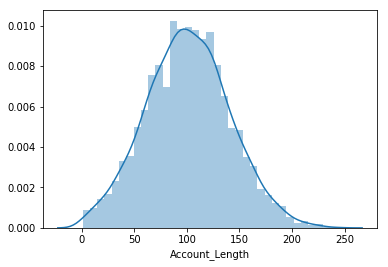

In [248]:
import seaborn as sns

sns.distplot(df['Account_Length'])
plt.show()

### Difference in account length between churners and non-churners

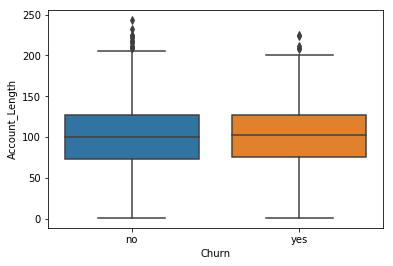

In [249]:
sns.boxplot(x='Churn', y='Account_Length', data=df)
plt.show()

There's no noticeable difference in account length

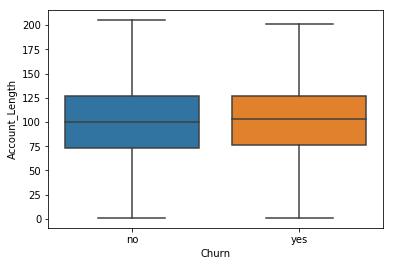

In [250]:
# To remove the outliers
sns.boxplot(x='Churn', y='Account_Length', data=df, sym="")
plt.show()

Do the 'International Plan' feature has an impact on the account length or churn?

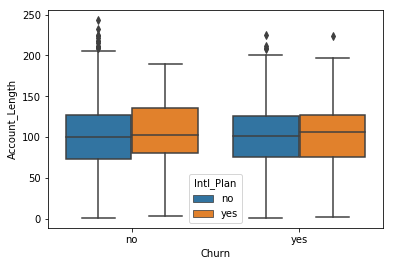

In [251]:
sns.boxplot(x='Churn', y='Account_Length', data=df, hue='Intl_Plan')
plt.show()

It doesn't matter whether or not a customer had an international plan

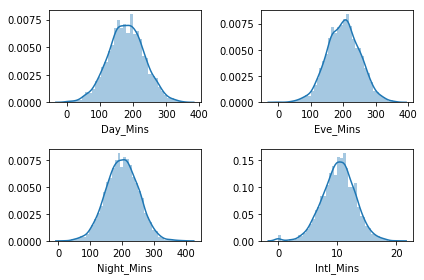

In [252]:
plt.subplot(2,2,1)
sns.distplot(df['Day_Mins'])

plt.subplot(2,2,2)
sns.distplot(df['Eve_Mins'])

plt.subplot(2,2,3)
sns.distplot(df['Night_Mins'])

plt.subplot(2,2,4)
sns.distplot(df['Intl_Mins'])
plt.tight_layout()
plt.show()

All of these features appear to be well approximated by the normal distribution. If this were not the case, we would have to consider applying a feature transformation of some kind.

We've already seen that there's not much of a difference in account lengths between churners and non-churners, but that there is a difference in the number of customer service calls left by churners.

Let's now visualize this difference using a box plot and incorporate other features of interest - do customers who have international plans make more customer service calls? Or do they tend to churn more? How about voicemail plans? Let's find out!

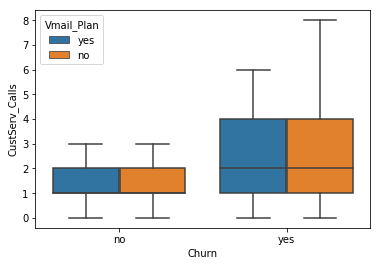

In [253]:
sns.boxplot(x='Churn', y='CustServ_Calls', data=df, hue='Vmail_Plan', sym="")
plt.show()

No difference whether the customer has Voice mail plan or not

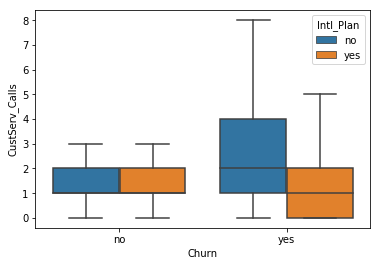

In [254]:
sns.boxplot(x='Churn', y='CustServ_Calls', data=df, hue='Intl_Plan', sym="")
plt.show()

There are some very interesting insights here. It looks like customers who do churn end up leaving more customer service calls, unless these customers also have an international plan, in which case they leave fewer customer service calls. This type of information is really useful in better understanding the drivers of churn.

ML Model assumptions:
- the features are normally distributed
- the features are on the same scale

if the features in the dataset don't meet these assumptions, then the results of the model won't be reliable.

Data types:
- Many ML models require numeric data types
-- (Binary) Need to encode categorical variables as numeric
-- (Multi) one hot encoding

Feature scaling:
- Features should be on the same scale which is rarely true for real-world data

Standardization:
- it centers the distribution around the mean
- calculates the number of standard deviations away from the mean each point is

In [255]:
# option 1
# Recasting data types
# Encoding binary features
df['Intl_Plan'] = df['Intl_Plan'].replace({'no':0, 'yes':1})
df['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

In [256]:
# option 2
from sklearn.preprocessing import LabelEncoder

df['Vmail_Plan'] = LabelEncoder().fit_transform(df['Vmail_Plan'])
df['Vmail_Plan'].head()

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64

In [257]:
d = pd.get_dummies(df['State'])
d.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Notice that this creates an entirely new DataFrame. Once you merge this back into the original DataFrame, you can begin using these state features in your models. Do note, however, that we now have many more features in our dataset, so we should consider dropping any that are unnecessary

In [258]:
# from keras.utils import to_categorical
# df['Churn'] = to_categorical(df['Churn'])
# df['Churn'].head()

In [259]:
# from sklearn.preprocessing import StandardScaler
# df = StandardScaler().fit_transform(df)

In [260]:
df_3 = df.loc[:,['Intl_Calls', 'Night_Mins']]
display(df_3.describe())

from sklearn.preprocessing import StandardScaler

df_3_scaled = StandardScaler().fit_transform(df_3)  
df_3_scaled = pd.DataFrame(df_3_scaled, columns=["Intl_Calls", "Night_Mins"])
display(df_3_scaled.describe())

,Intl_Calls,Night_Mins
count,3333.000000,3333.000000
mean,4.479448,200.872037
std,2.461214,50.573847
min,0.000000,23.200000
25%,3.000000,167.000000
50%,4.000000,201.200000
75%,6.000000,235.300000
max,20.000000,395.000000


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,Intl_Calls,Night_Mins
count,3.333000e+03,3.333000e+03
mean,-1.264615e-16,6.602046e-17
std,1.000150e+00,1.000150e+00
min,-1.820289e+00,-3.513648e+00
25%,-6.011951e-01,-6.698545e-01
50%,-1.948306e-01,6.485803e-03
75%,6.178983e-01,6.808485e-01
max,6.307001e+00,3.839081e+00


### Dropping unnecessary features
Datasets often have features that provide no predictive power and need to be dropped modeling.
- Unique identifiers. Ex: Phone numbers, SSN, account number
- Dropping highly correlated features: they don't provide no additional info to the model


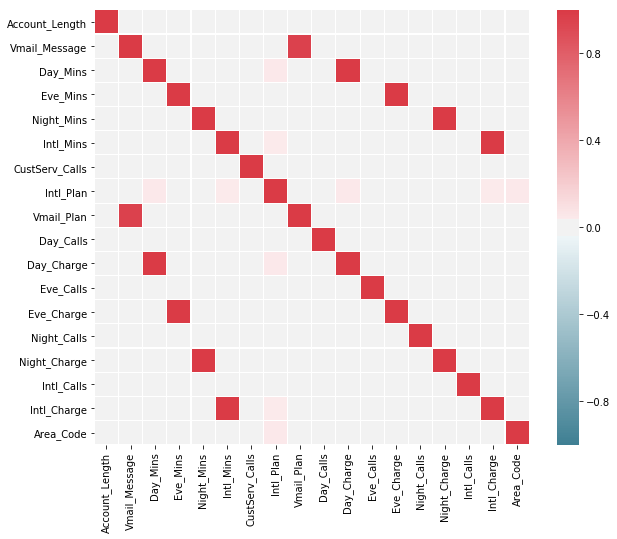

In [261]:
plt.figure(figsize=(10,8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, vmin=-1., square=True, cmap=cmap, linecolor='white')

Feature engineering:
- Creating new features to help improve the model performance

Example: Total Minutes: sum of 'Day_Mins', 'Eve_Mins', 'Night_Mins', 'Intl_Mins'

Leveraging domain knowledge to engineer new features is an essential part of modeling. This quote from Andrew Ng summarizes the importance of feature engineering:
Coming up with features is difficult, time-consuming, requires expert knowledge. "Applied machine learning" is basically feature engineering.

In [262]:
# average length of night calls made by customers
# Create the new feature
df['Avg_Night_Calls'] = df['Night_Mins'] / df['Night_Calls']

# Print the first five rows of 'Avg_Night_Calls'
print(df['Avg_Night_Calls'].head())

0    2.689011
1    2.469903
2    1.563462
3    2.212360
4    1.544628
Name: Avg_Night_Calls, dtype: float64


In [263]:
from sklearn.model_selection import train_test_split

features = df.drop(['Churn', 'Avg_Night_Calls', 'Phone', 'State', 'Area_Code'], axis=1)
display(features.shape)
df['Churn'] = df['Churn'].replace({'no':0, 'yes':1})
X_train, X_test, y_train, y_test = train_test_split(features, df['Churn'], test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(3333, 17)

((2333, 17), (2333,), (1000, 17), (1000,))

confusion_matrix: 
 [[836  21]
 [120  23]]
Accuracy:  0.859
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       857
           1       0.52      0.16      0.25       143

   micro avg       0.86      0.86      0.86      1000
   macro avg       0.70      0.57      0.58      1000
weighted avg       0.82      0.86      0.83      1000



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


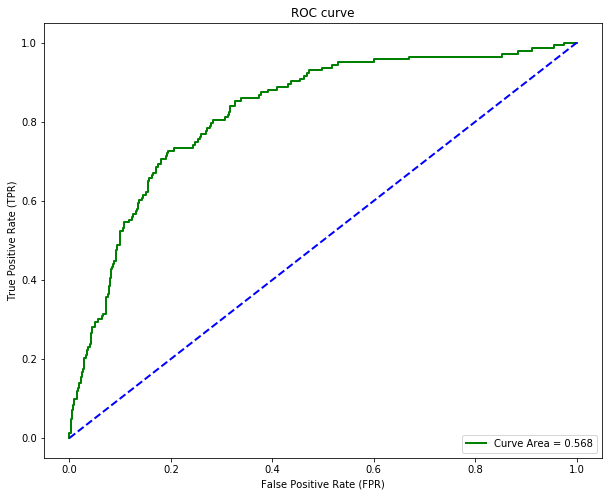

In [264]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

LR = LogisticRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix)

print('Accuracy: ', accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

fpr, tpr, thr = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

confusion_matrix: 
 [[810  47]
 [ 39 104]]
Accuracy:  0.914
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       857
           1       0.69      0.73      0.71       143

   micro avg       0.91      0.91      0.91      1000
   macro avg       0.82      0.84      0.83      1000
weighted avg       0.92      0.91      0.91      1000



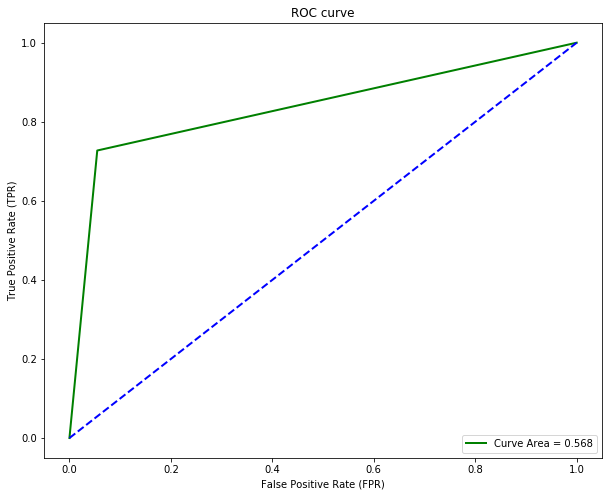

In [267]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(features, df['Churn'], test_size=0.3, random_state=42)

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

y_pred_DT = DT.predict(X_test)

confusion_matrix_DT = confusion_matrix(y_test, y_pred_DT)
print('confusion_matrix: \n', confusion_matrix_DT)

print('Accuracy: ', accuracy_score(y_test, y_pred_DT))

print(classification_report(y_test, y_pred_DT))

fpr, tpr, thr = roc_curve(y_test, DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

confusion_matrix: 
 [[853   4]
 [ 56  87]]
Accuracy:  0.94
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       857
           1       0.96      0.61      0.74       143

   micro avg       0.94      0.94      0.94      1000
   macro avg       0.95      0.80      0.85      1000
weighted avg       0.94      0.94      0.93      1000



/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


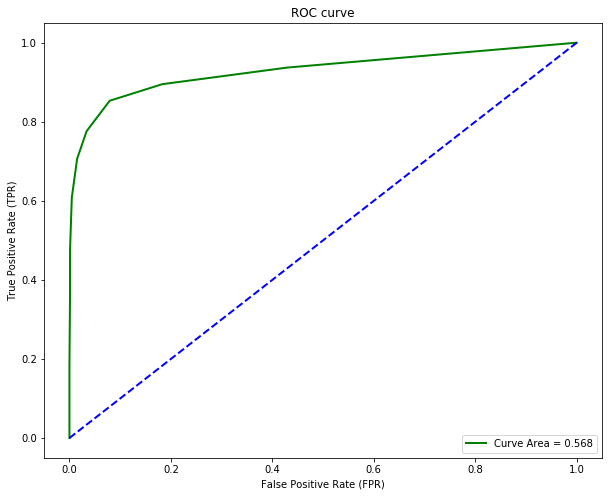

In [266]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(features, df['Churn'], test_size=0.3, random_state=42)

RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_pred_RF = RF.predict(X_test)

confusion_matrix_RF = confusion_matrix(y_test, y_pred_RF)
print('confusion_matrix: \n', confusion_matrix_RF)

print('Accuracy: ', accuracy_score(y_test, y_pred_RF))

print(classification_report(y_test, y_pred_RF))

fpr, tpr, thr = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()